In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats
from matplotlib.ticker import FuncFormatter

# Real Data

In [2]:
Data = pd.read_csv('selected_Korean_data.csv',parse_dates=['date'],index_col= ['date'],)

In [3]:
Data.head()

,location,new_cases,reproduction_rate,new_deaths,hosp_patients,icu_patients,new_tests,positive_rate,new_vaccinations,people_vaccinated,people_fully_vaccinated
date,,,,,,,,,,,
2020-01-03,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-06,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-07,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mean test at the begining: 68057.12631578947
Maximum test: 1154325.0
Mean vaccinations at the begining: 150728.6092105263
Maximum vaccination: 1382042.0


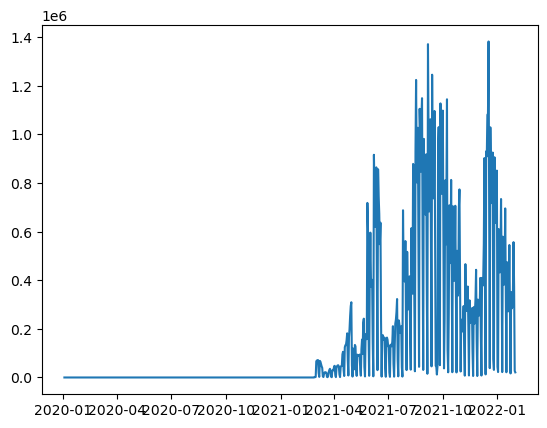

In [4]:
Data1 = Data[:'2022-01-31']
Mean_vacc_begining = np.mean(Data1['new_vaccinations'])
Mean_test_begining = np.mean(Data1['new_tests']) 
Maximum_test_all = max(Data['new_tests'])
Maximum_vacc_all = max(Data['new_vaccinations'])
print('Mean test at the begining:', Mean_test_begining)
print('Maximum test:', Maximum_test_all)
print('Mean vaccinations at the begining:', Mean_vacc_begining)
print('Maximum vaccination:', Maximum_vacc_all)
plt.plot(Data1['new_vaccinations'])

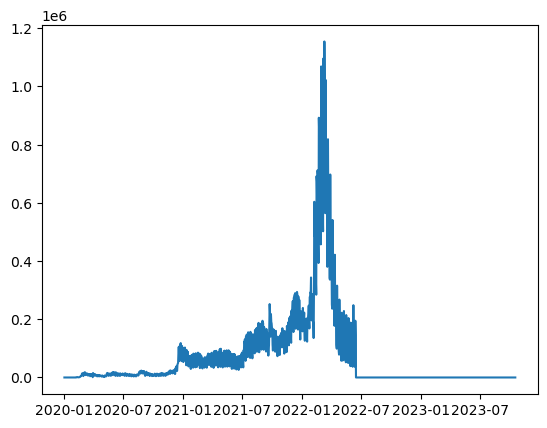

In [5]:
plt.plot(Data['new_tests'])

In [6]:
Data_Omicron = Data['2022-02-01':'2022-05-30']
Data_Omicron['test_positive'] = Data_Omicron['new_tests']*Data_Omicron['positive_rate']

C:\Users\sharbayta\AppData\Local\Temp\ipykernel_39644\955679090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Omicron['test_positive'] = Data_Omicron['new_tests']*Data_Omicron['positive_rate']


In [7]:
Data_Omicron.head()

,location,new_cases,reproduction_rate,new_deaths,hosp_patients,icu_patients,new_tests,positive_rate,new_vaccinations,people_vaccinated,people_fully_vaccinated,test_positive
date,,,,,,,,,,,,
2022-02-01,South Korea,20267.0,1.55,15.0,0.0,272.0,224950.0,0.0658,3323.0,44365186.0,43733104.0,14801.7100
2022-02-02,South Korea,22906.0,1.60,25.0,0.0,278.0,213460.0,0.0729,14025.0,44365703.0,43733972.0,15561.2340
2022-02-03,South Korea,27437.0,1.72,24.0,0.0,274.0,286476.0,0.0795,394225.0,44378056.0,43786376.0,22774.8420
2022-02-04,South Korea,36347.0,1.85,22.0,0.0,257.0,194411.0,0.0953,407972.0,44390550.0,43821838.0,18527.3683
2022-02-05,South Korea,38680.0,1.87,15.0,0.0,269.0,186014.0,0.1191,230104.0,44397834.0,43839883.0,22154.2674


In [8]:
Max_daily_vac = np.max(Data['new_vaccinations'])
#Min_daily_vac = np.min(np.nonzero(Data_Omicron['new_vaccinations']))
Min_daily_vac = np.min(Data['new_vaccinations'][Data['new_vaccinations'] != 0])
Max_daily_Tests = np.max(Data['new_tests'])
Min_daily_Tests = np.min(Data['new_tests'][Data['new_tests'] != 0])

In [9]:
print('Daily_max_Vac = ',Max_daily_vac)
print('Daily_min_Vac = ',Min_daily_vac)
print('Daily_max_Test = ',Max_daily_Tests)
print('Daily_min_Test = ',Min_daily_Tests)

Daily_max_Vac =  1382042.0
Daily_min_Vac =  34.0
Daily_max_Test =  1154325.0
Daily_min_Test =  427.0


In [10]:
# Max_daily_vac = np.max(Data_Omicron['new_vaccinations'])
# #Min_daily_vac = np.min(np.nonzero(Data_Omicron['new_vaccinations']))
# Min_daily_vac = np.min(Data_Omicron['new_vaccinations'][Data_Omicron['new_vaccinations'] != 0])
# Max_daily_Tests = np.max(Data_Omicron['new_tests'])
# Min_daily_Tests = np.min(Data_Omicron['new_tests'][Data_Omicron['new_tests'] != 0])

In [11]:
# print('Daily_max_Vac = ',Max_daily_vac)
# print('Daily_min_Vac = ',Min_daily_vac)
# print('Daily_max_Test = ',Max_daily_Tests)
# print('Daily_min_Test = ',Min_daily_Tests)

In [12]:
Omicron_New_Cases = pd.read_csv('Omicron_wave_Jan_May.csv',parse_dates=['date'],index_col= ['date'],)

In [13]:
SevendayRollingAve1 = pd.read_csv('7day_rolling_Ave.csv')

In [14]:
SevendayRollingAve = SevendayRollingAve1['NewCases_7day_rolling_Ave']

In [15]:
Omicron_New_Cases.head()

,location,new_cases,new_deaths,hosp_patients,new_tests,people_vaccinated,people_fully_vaccinated
date,,,,,,,
2022-02-01,South Korea,20267.0,15.0,0.0,224950.0,44365186.0,43733104.0
2022-02-02,South Korea,22906.0,25.0,0.0,213460.0,44365703.0,43733972.0
2022-02-03,South Korea,27437.0,24.0,0.0,286476.0,44378056.0,43786376.0
2022-02-04,South Korea,36347.0,22.0,0.0,194411.0,44390550.0,43821838.0
2022-02-05,South Korea,38680.0,15.0,0.0,186014.0,44397834.0,43839883.0


In [16]:
NewCases = Omicron_New_Cases['new_cases']  
vaccinated = Omicron_New_Cases['people_vaccinated']
newvaccinated = Data_Omicron['new_vaccinations']
new_positive_tested = Data_Omicron['test_positive']
new_death = Data_Omicron['new_deaths']

In [17]:
#newvaccinated.mean()
mean_new_tests = Omicron_New_Cases['new_tests'].mean()
0.01*(mean_new_tests/51815808)*0.0658

4.979676433879021e-06

In [18]:
cum_new_cases = np.cumsum(Omicron_New_Cases['new_cases'])
cum_new_vacc = np.cumsum(newvaccinated)
cum_new_pos_test = np.cumsum(new_positive_tested)
cum_new_death = np.cumsum(new_death)
#cum_new_cases.to_csv('cum_cases.csv')

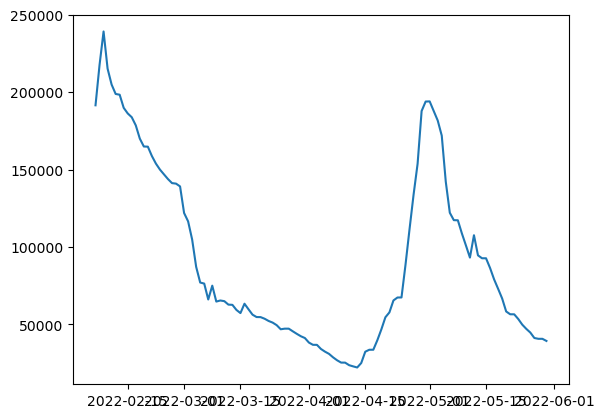

In [19]:
rolling_ave_vaccinated = newvaccinated.rolling(window=7).mean()
plt.plot(rolling_ave_vaccinated)

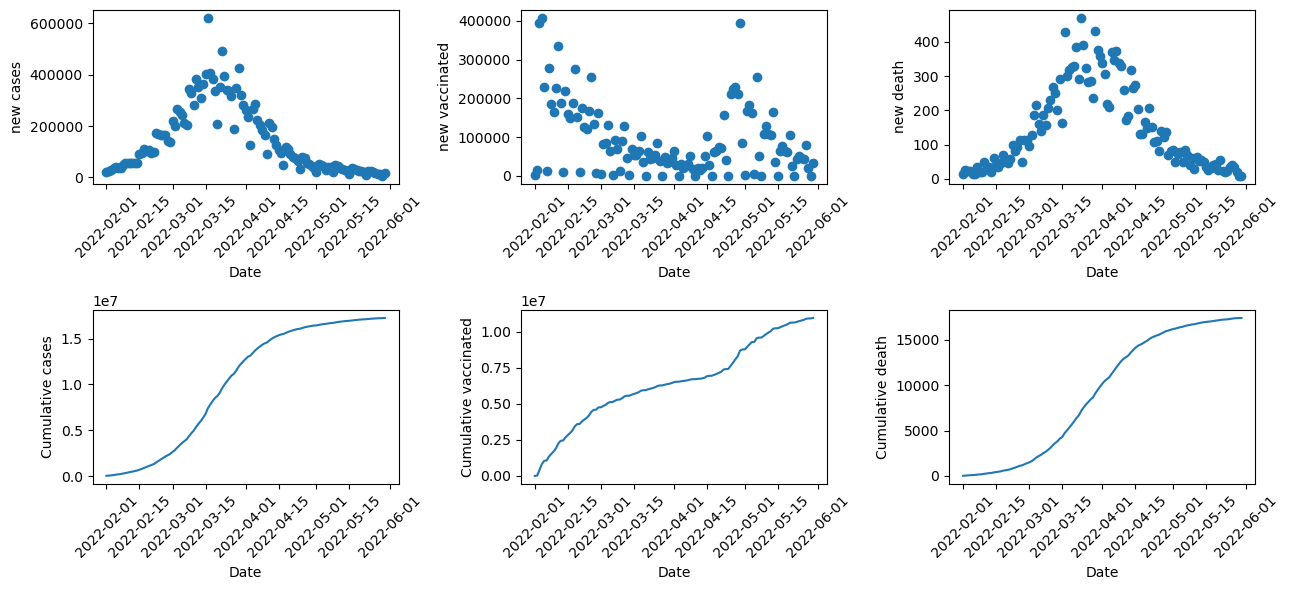

In [20]:

fig, ax = plt.subplots(2,3, figsize=(13,6))

# Add x-axis and y-axis
ax[0,0].scatter(Omicron_New_Cases.index.values, NewCases)
ax[0,1].scatter(Omicron_New_Cases.index.values, newvaccinated)
ax[0,2].scatter(Omicron_New_Cases.index.values, new_death)

ax[1,0].plot(Omicron_New_Cases.index.values, cum_new_cases)
ax[1,1].plot(Omicron_New_Cases.index.values, cum_new_vacc)
ax[1,2].plot(Omicron_New_Cases.index.values, cum_new_death)
#ax.plot(Omicron_New_Cases.index.values,
       #Omicron_New_Cases['NewCases_7day_rolling_Ave'],
      # color='green',label = 'New Cases')


ax[0,0].set(xlabel="Date", ylabel="new cases")
ax[0,1].set(xlabel="Date", ylabel="new vaccinated")
ax[0,2].set(xlabel="Date", ylabel="new death")
ax[1,0].set(xlabel="Date", ylabel="Cumulative cases")
ax[1,1].set(xlabel="Date", ylabel="Cumulative vaccinated")
ax[1,2].set(xlabel="Date", ylabel="Cumulative death")


      
ax[0,0].tick_params(axis='x', rotation=45)
ax[0,1].tick_params(axis='x', rotation=45)
ax[0,2].tick_params(axis='x', rotation=45)
ax[1,0].tick_params(axis='x', rotation=45)
ax[1,1].tick_params(axis='x', rotation=45)
ax[1,2].tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.show()

In [21]:
maxi= len(NewCases)
tf = np.linspace(0, maxi, maxi)
#tf1 = np.linspace(0, 50, 50)
#tf2 = np.linspace(50, 119, 69)

In [22]:
#Fixed parameter values
pi = 1710; 
#beta1 =1.72;
mu =1/(83*365); 
eps =0.33;   #Youngji paper
tau1 = 0.8; tau2 = 0.8; tau =0.8;
psi1 = 0.5; psi = 0.5;
phi1, phi2 = 1/180, 1/180
h1= 0.0045; 
h2 = (1-0.74)*h1;
rho = 1/14; rhot =1/10; rhoh =1/10;
eta1= 0.71; eta2= 0.41; eta4= 0.85; eta3 = 0.46;

d1 =0.000071; d2 = 0.000073; 



#beta1 = (1.72*(eps+mu)*(mu+rho)*(mu+rho+d1))/(eps*((tau1+tau2)*(mu+rho) +(1-tau1)*psi1*(mu+rho+d1)))


theta = 0.5 # parameter adjusting reduced perception risk (assumed)
delta = 0.8  # proportion of tested people who quarantine/adhere to protective measures (assumed)

Dtilde, Btilde = 5, 5
D, B = 1*Dtilde, 1*Btilde
Fmax = 0.027; F10 = 0.0029; F20 = (0.9)*F10;
Tmax = 0.5; T10 = 0.03; T20 = 0.03
#Tmax = 0.022;  T10 = 0.0013; T20 = T10;  
a = 1/3  # fixed to be 3 days 

alpha1, alpha2 = 0.5, 0.5


In [23]:
#initital guess for the parameters to be fitted
beta1 = 1.14
beta2 = 1.6;  
k1 = 0.8; 
xi= 0.5; 
#d1, d2 = 0.00012, 0.00012
# guess = [beta2,D,Dtilde,k1,B,Btilde,a,phi1,phi2,xi,h1,h2,Fmax, F10,F20,Tmax,T10,T20]

In [24]:
# Initial conditions
NN = 51815808
V2_0 = int(0.87*Data_Omicron['new_vaccinations'].iloc[0])
V1_0 = int(0.13*Data_Omicron['new_vaccinations'].iloc[0])
E2_0 = int(0.87*20*NewCases.iloc[0])
A2_0 = int(0.2*E2_0)
I2_0 = int(0.8*E2_0)
IT2_0 = int(0.87*NewCases.iloc[0])
E1_0 =int(0.13*20*NewCases.iloc[0])  # 0.13 indicates that 13% of the total population is in the first dynamics
A1_0 = int(0.2*E1_0)
I1_0 = int(0.8*E1_0)
IT1_0 = int(0.13*NewCases.iloc[0])
H_0 = 202  # ICU
R_0 = 200
D_0 = 15
MV_0 = k1*((I1_0 + I2_0 + IT1_0 + IT2_0 + H_0)/NN)
MN_0 = k1*((H_0 + d1*(I1_0+I2_0) + d2*H_0)/NN)
S2_0 = 40000000 # 0.9*(Omicron_New_Cases['people_vaccinated'].iloc[0])
S3_0 = 4365186 #0.1*(Omicron_New_Cases['people_vaccinated'].iloc[0])
S1_0 = NN-(S2_0 + S3_0 + V1_0 + V2_0 + E1_0 + E2_0 + A1_0 + A2_0 + I1_0 + I2_0 + IT1_0 + IT2_0 + H_0 + R_0)

In [25]:
x0 = [S1_0, S2_0, S3_0, V1_0, V2_0, E1_0, E2_0, A1_0, A2_0, I1_0, I2_0, IT1_0, IT2_0, H_0, R_0, D_0, MV_0, MN_0]

In [26]:
IT1_0

2634

In [27]:
def model_eq(x,tf,pi, mu,eps, tau1, tau2, rho, rhot, rhoh, psi1,eta1, eta2, D,Dtilde, a,phi1, phi2, h1, h2,Fmax, F10,F20,Tmax,T10,T20, beta1,beta2,k1,xi, d1, d2):
    S1, S2, S3, V1, V2, E1, E2, A1, A2, I1, I2, I_T1, I_T2, H, R, Dth, MV,MN = x
    #dx = np.zeros(9)
    
    
    N= S1 + S2+ S3 + V1 + V2 + E1 + E2 + A1 + A2 + I1 + I2 + I_T1 + I_T2 + H + R
    
    T1 = T10 + (Tmax -T10)*(alpha1*(D*MV)/(1+D*MV) + (1-alpha1)*(B*MN)/(1+B*MN) )
    F1 = F10 + (Fmax -F10)*(alpha1*(Dtilde*MV)/(1+Dtilde*MV) + (1-alpha1)*(Btilde*MN)/(1+Btilde*MN))
    
    T2 = T20 + (Tmax -T20)*(alpha2*(theta*D*MV)/(1+theta*D*MV) + (1-alpha2)*(theta*B*MN)/(1+theta*B*MN) )
    F2 = F20 + (Fmax -F20)*(alpha2*(theta*Dtilde*MV)/(1+theta*Dtilde*MV) + (1-alpha2)*(theta*Btilde*MN)/(1+theta*Btilde*MN))
    
    L1 = beta1*(I1 + I2 + psi1*(A1 + A2) +(1-delta)*(I_T1 + I_T2))/(N-(delta*(I_T1 + I_T2) + H))
    L2 = beta2*(I1 + I2 + psi1*(A1 + A2) +(1-delta)*(I_T1 + I_T2))/(N-(delta*(I_T1 + I_T2) + H))
    
    dS1 = pi-(F1 +L1 +mu)*S1
    dS2 = phi1*V1 -((1-eta2)*L2+F2+mu)*S2
    dS3 = phi2*R-((1-eta3)*L2+F2+mu)*S3
    dV1 = F1*S1-phi1*V1-(1-eta1)*L2*V1-mu*V1
    dV2 = F2*S2+F2*S3-(1-eta4)*L2*V2-mu*V2
    dE1 = L1*S1-(eps+mu)*E1
    dE2 = (1-eta1)*L2*V1+(1-eta4)*L2*V2+L2*((1-eta2)*S2+(1-eta3)*S3)-(mu+eps)*E2
    dA1 = (1-tau1)*eps*E1-xi*T1*A1-(rho+mu)*A1
    dA2 = (1-tau2)*eps*E2-xi*T2*A2-(rho+mu)*A2
    dI1 = tau1*eps*E1-T1*I1-(rho+d1+mu)*I1
    dI2 = tau2*eps*E2-T2*I2-(rho+d1+mu)*I2
    dI_T1 = xi*T1*A1+T1*I1-(rhot+h1+mu)*I_T1
    dI_T2 = xi*T2*A2+T2*I2-(rhot+h2+mu)*I_T2
    dH = h1*I_T1+h2*I_T2-rhoh*H-(d2+mu)*H
    dR = rho*(A1+A2+I1+I2)+rhot*(I_T1+I_T2)+rhoh*H-(phi2+mu)*R
    dDth = d1*(I1+I2)+d2*H
    dMV = a*(k1*((I_T1+I1+I2+I_T2+H)/NN) - MV)
    dMN = a*(k1*((H + d1*(I1 + I2) + d2*H)/NN)-MN)
    return dS1, dS2, dS3, dV1, dV2, dE1, dE2, dA1, dA2, dI1, dI2, dI_T1, dI_T2, dH, dR, dDth, dMV, dMN

In [28]:
def solve_ode(tf,beta1,beta2, k1, xi):
    y = odeint(model_eq, x0, tf,args = (pi, mu,eps, tau1, tau2, rho, rhot, rhoh, psi1,eta1, eta2, D,Dtilde, a,phi1, phi2,h1, h2,Fmax, F10,F20,Tmax,T10,T20,beta1,beta2, k1, xi,d1, d2))   
    Vac1_1 = F10 + (Fmax -F10)*(alpha1* np.divide(Dtilde*y[:,16],(1+Dtilde*y[:,16])) + (1-alpha1)* np.divide(Btilde*y[:,17],(1+Btilde*y[:,17])))  
    Vac2_1 = F20 + (Fmax -F20)*(alpha2* np.divide(theta*Dtilde*y[:,16],(1+theta*Dtilde*y[:,16])) + (1-alpha2)* np.divide(theta*Btilde*y[:,17],(1+theta*Btilde*y[:,17])) ) 
    new_vac =  np.multiply(Vac1_1,y[:,0]) + np.multiply(Vac2_1,(y[:,1]+y[:,2]))

    Test1_1 = T10 + (Tmax -T10)*(alpha1* np.divide(D*y[:,16],(1+D*y[:,16])) + (1-alpha1)* np.divide(B*y[:,17],(1+B*y[:,17]))) 
    Test2_1 = T20 + (Tmax -T20)*(alpha2* np.divide(theta*D*y[:,16],(1+theta*D*y[:,16])) + (1-alpha2)* np.divide(theta*B*y[:,17],(1+theta*B*y[:,17]))) 
    new_test = np.multiply(Test1_1,(xi*y[:,7]+ y[:,9])) + np.multiply(Test2_1,(xi*y[:,8]+ y[:,10]))
    #Daily_tested = np.diff(y[:,11]+y[:,12])
    new_death1 = d1*(y[:,9]+y[:,10])+d2*y[:,13]

    # NNN = y[:,0] + y[:,1]  + y[:,2] + y[:,3] + y[:,4] + y[:,5] +y[:,6] + y[:,7] + y[:,8]  + y[:,9] + y[:,10] + y[:,14]
    # L11 = np.divide(beta1*(y[:,9] + y[:,10] + psi1*(y[:,7] + y[:,8])),NNN)
    # L22 = np.divide(beta2*(y[:,9] + y[:,10] + psi1*(y[:,7] + y[:,8])),NNN)
    # new_inf = np.multiply(L11,y[:,0]) + np.multiply(L22,(y[:,1] + y[:,2])) + (1-eta1)*np.multiply(L11,y[:,3]) + (1-eta2)*np.multiply(L22,y[:,4])  


    #App_cum_cases = np.cumsum(y[:,9] + y[:,10])
    #App_cum_vac = np.cumsum(y[:,3] + y[:,4])
    App_cum_cases = np.cumsum(new_test)
    App_cum_vac = np.cumsum(new_vac)
    #App_cum_test = np.cumsum(new_test)
    App_cum_death = np.cumsum(new_death1)
    return App_cum_cases, App_cum_vac, App_cum_death

In [29]:
def fit_model(tf,beta1,beta2, k1, xi):
    apr_cum_cases, apr_cum_vac, apr_cum_death = solve_ode(tf, beta1, beta2, k1, xi)
    return np.concatenate([apr_cum_cases, apr_cum_vac, apr_cum_death])
    

In [30]:
def sum_squared_error(params, tf, cum_new_cases, cum_new_vacc, cum_new_death):
    beta1, beta2, k1, xi = params
    y_fit_infected, y_fit_vacc, y_fit_death = solve_ode(tf, beta1, beta2, k1, xi)
    error_inf = cum_new_cases - y_fit_infected
    error_vacc = cum_new_vacc - y_fit_vacc
    error_death =  cum_new_death - y_fit_death
    return np.sum(error_inf**2) + np.sum(error_vacc**2) + np.sum(error_death**2)

In [31]:
official_cum_data = np.concatenate([cum_new_cases,cum_new_vacc,cum_new_death])  

In [32]:
tolerance = 1
iteration = 0
max_iterations = 1
current_params = [beta1, beta2,k1,xi]

while iteration < max_iterations:
    # Use curve_fit to fit the SIR model to the data.
    #  [(0,   0,   0,   0.5,  0,   0,   1/5,  0,     0.02,     1.8e-5,   1.8e-5,     0.8,      5e-6,  0.5),\
    # (2,   100, 100, 0.9,  100, 100, 1/2,  0.9,   0.27,     1.9e-2,   1.9e-2,     0.9,    0.75,  0.75)]
    
    popt, pcov = curve_fit(fit_model,tf,official_cum_data,p0 = current_params,bounds =[(0,0,0,0), (3,3,1,1)])   
    current_error = sum_squared_error(popt, tf, cum_new_cases,cum_new_vacc,cum_new_death) #cum_new_cases

    # Check if the sum squared error is below the tolerance.
    if current_error < tolerance:
        break

    # Update the initial parameters with the current parameters.
    current_params = popt

    iteration += 1
print('Maximum iteration =', iteration)  
#print('Current error = ',current_error)
fitted_cum_cases, fitted_cum_vacc, fitted_cum_death = solve_ode(tf, *popt)

beta1 = popt[0]; beta2 = popt[1];  k1 = popt[2];  
xi = popt[3]; 


S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;

C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe) + beta1*(1-eta1)*V1_dfe);
M1 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T10))
M2 = (eps*tau)/((mu +eps)*(d1+mu+rho+T10))
M3 = (eps*tau)/((mu +eps)*(d1+mu+rho+T20))
M4 = ( xi*(1-tau)*T10*eps*(d1+mu+rho+T10) + tau*T10*eps*(mu+rho+xi*T10))/((mu +eps)*(d1+mu+rho+T10)*(h1+mu+rhot)*(mu+rho+xi*T10))
M5 = tau*T20*eps/((mu +eps)*(d1+mu+rho+T20)*(h2+mu+rhot))
M6 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T20))
M7 = xi*(1-tau)*eps*T20/((mu +eps)*(mu+rho+xi*T20)*(h2+mu+rhot))
R_e = C1*(psi*M1 + M2 + M3 + (1-delta)*(M4+M5)) + C2*(psi*M6 + (1-delta)*M7)
print('Reproduction number =', R_e)


Maximum iteration = 1
Reproduction number = 0.19831839223535824


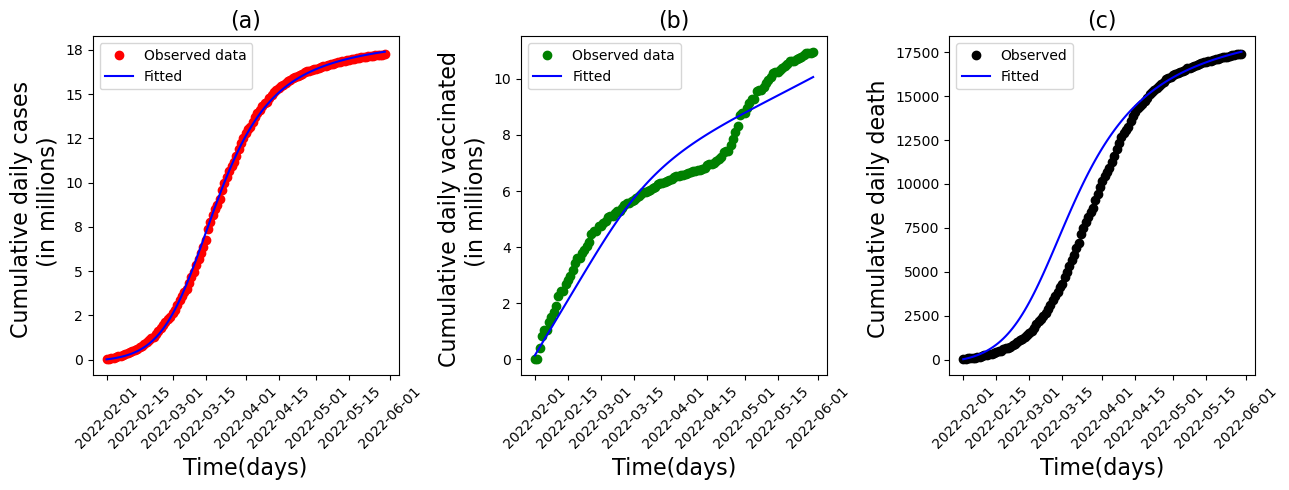

In [33]:
def millions_formatter(x, pos):    
    return f'{(x / 1000000):.0f}'
fig, axs = plt.subplots(1,3,figsize=(13,5))
axs[0].plot(Omicron_New_Cases.index.values, cum_new_cases, 'ro', label='Observed data') 
axs[0].plot(Omicron_New_Cases.index.values,fitted_cum_cases , 'b-', label='Fitted')
axs[0].set_xlabel('Time(days)',fontsize=16)
axs[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[0].set_ylabel('Cumulative daily cases \n (in millions)',fontsize=16)
axs[0].set_title('(a)',fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()

axs[1].plot(Omicron_New_Cases.index.values, cum_new_vacc, 'go', label='Observed data')
axs[1].plot(Omicron_New_Cases.index.values, fitted_cum_vacc, 'b-', label='Fitted')
axs[1].set_xlabel('Time(days)',fontsize=16)
axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[1].set_ylabel('Cumulative daily vaccinated \n (in millions)',fontsize=16)
axs[1].set_title('(b)',fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend()

axs[2].plot(Omicron_New_Cases.index.values, cum_new_death, 'ko', label='Observed')
axs[2].plot(Omicron_New_Cases.index.values, fitted_cum_death, 'b-', label='Fitted')
axs[2].set_xlabel('Time(days)',fontsize=16)
#axs[2].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axs[2].set_ylabel('Cumulative daily death ',fontsize=16)
axs[2].set_title('(c)',fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].legend()
plt.tight_layout()
plt.savefig('full_model_fit_New_BB.png')
plt.show()


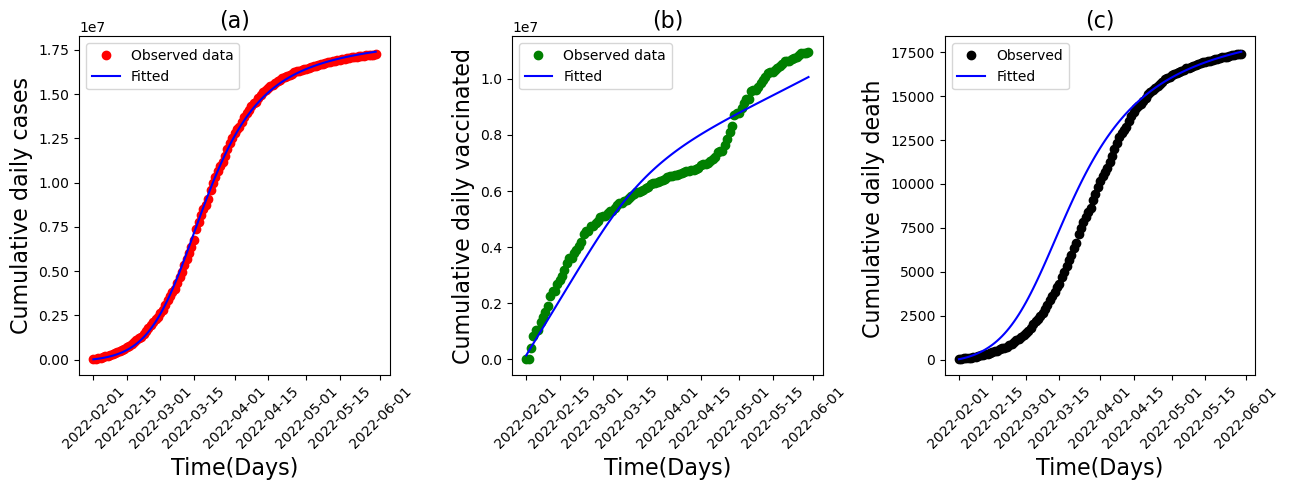

In [34]:

plt.figure(figsize=(13, 5))
plt.subplot(1, 3, 1)
plt.plot(Omicron_New_Cases.index.values, cum_new_cases, 'ro', label='Observed data') 
#plt.scatter(tf, NewCases, label='NewCases')
plt.plot(Omicron_New_Cases.index.values,fitted_cum_cases , 'b-', label='Fitted')
plt.legend()
plt.xlabel('Time(Days)',fontsize=16)
plt.ylabel('Cumulative daily cases',fontsize=16)
#axs.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('(a)',fontsize=16)
plt.tick_params(axis='x', rotation=45)

plt.subplot(1, 3, 2)
plt.plot(Omicron_New_Cases.index.values, cum_new_vacc, 'go', label='Observed data')
plt.plot(Omicron_New_Cases.index.values, fitted_cum_vacc, 'b-', label='Fitted')
plt.legend()
plt.xlabel('Time(Days)',fontsize=16)
#axs.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.ylabel('Cumulative daily vaccinated',fontsize=16)
plt.title('(b)',fontsize=16)
plt.tick_params(axis='x', rotation=45)
plt.subplot(1, 3, 3)
plt.plot(Omicron_New_Cases.index.values, cum_new_death, 'ko', label='Observed')
plt.plot(Omicron_New_Cases.index.values, fitted_cum_death, 'b-', label='Fitted')
plt.legend()
plt.xlabel('Time(Days)',fontsize=16)
plt.ylabel('Cumulative daily death ',fontsize=16)

plt.title('(c)',fontsize=16)
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
#plt.savefig('full_model_fit_New_BB.pdf',dpi =600)
plt.show()

# Fitted parameter values

In [35]:
print('\n Behavior related parameters')
print('\n k1= ',k1)

print('\n Non-Behavior related parameters')
print('\n beta1= ',beta1)
print('\n beta2= ',beta2)
print('\n xi= ', xi)
# print('\n d1 = ', d1)
# print('\n d2 = ', d2)


 Behavior related parameters

 k1=  0.505784569956099

 Non-Behavior related parameters

 beta1=  0.6535066759260209

 beta2=  0.3939311269385401

 xi=  0.9999999999999979


In [36]:
MV_0 = k1*((I1_0+I2_0+IT1_0+IT2_0+H_0)/NN)
MN_0 = k1*((H_0 + d1*(I1_0+I2_0)+ d2*H_0)/NN)
x0 = [S1_0, S2_0, S3_0, V1_0, V2_0, E1_0, E2_0, A1_0, A2_0, I1_0, I2_0, IT1_0, IT2_0, H_0, R_0, D_0, MV_0, MN_0]
y = odeint(model_eq, x0, tf,args = (pi, mu,eps, tau1, tau2, rho, rhot, rhoh, psi1,eta1, eta2, D,Dtilde, a,phi1, phi2,h1, h2,Fmax, F10,F20,Tmax,T10,T20,beta1, beta2, k1, xi, d1, d2))
Test1_1 = T10 + (Tmax -T10)*(alpha1* np.divide(D*y[:,16],(1+D*y[:,16])) + (1-alpha1)* np.divide(B*y[:,17],(1+B*y[:,17]))) 
Test2_1 = T20 + (Tmax -T20)*(alpha2* np.divide(theta*D*y[:,16],(1+theta*D*y[:,16])) + (1-alpha2)* np.divide(theta*B*y[:,17],(1+theta*B*y[:,17]))) 
Vac1_1 = F10 + (Fmax -F10)*(alpha1* np.divide(Dtilde*y[:,16],(1+Dtilde*y[:,16])) + (1-alpha1)* np.divide(Btilde*y[:,17],(1+Btilde*y[:,17])))  
Vac2_1 = F20 + (Fmax -F20)*(alpha2* np.divide(theta*Dtilde*y[:,16],(1+theta*Dtilde*y[:,16])) + (1-alpha2)* np.divide(theta*Btilde*y[:,17],(1+theta*Btilde*y[:,17])) ) 

New_test = np.multiply(Test1_1,(xi*y[:,7]+ y[:,9])) + np.multiply(Test2_1,(xi*y[:,8]+ y[:,10]))
np.save('behavioral_model_best_fit.npy', New_test)
#New_test.to_csv('behavioral_model_best_fit.csv')

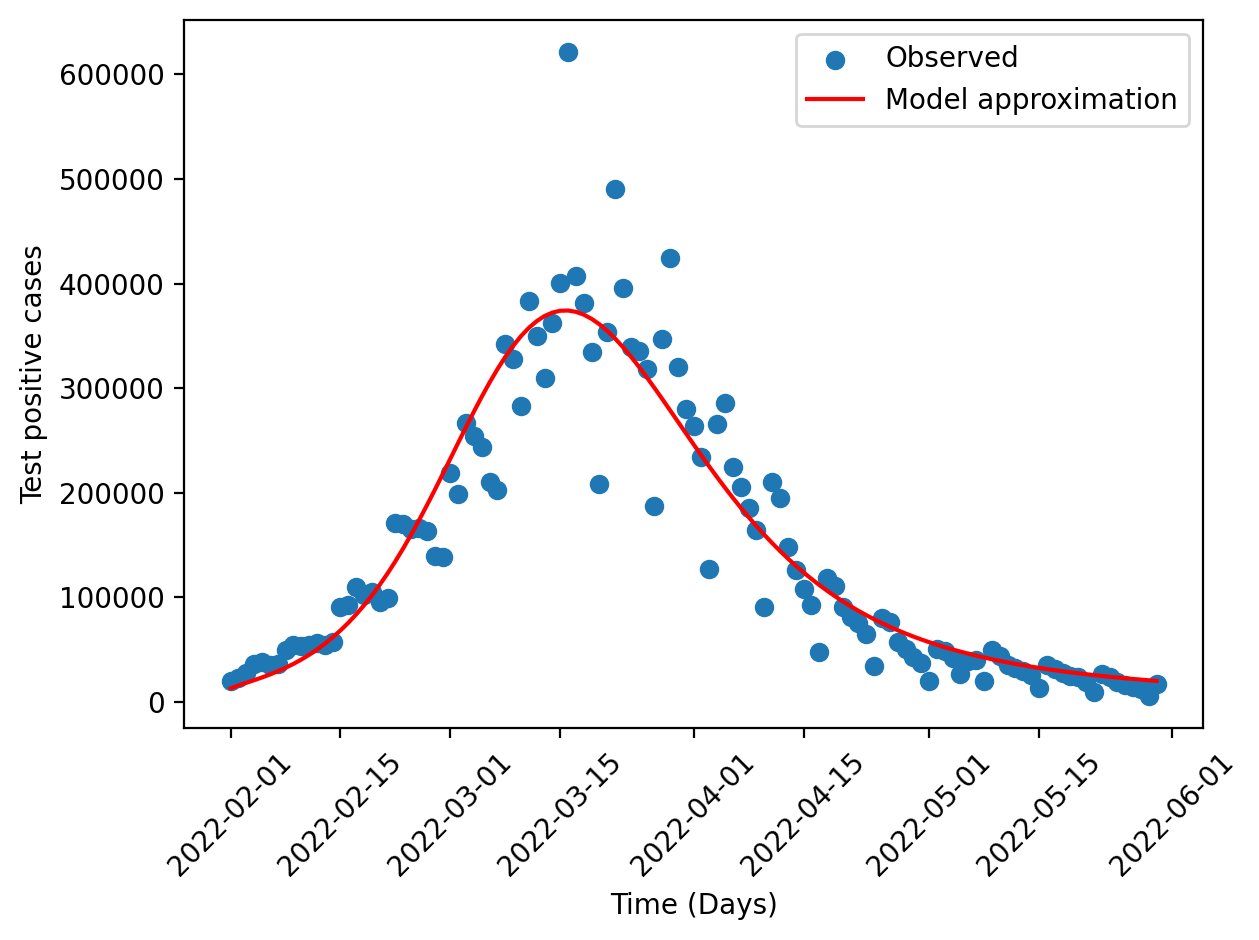

In [37]:
fig = plt.subplots(dpi =200)
#plt.plot(Omicron_New_Cases.index.values,y[:,11]+y[:,12], 'blue', label = 'fitted prevalence ')
plt.scatter(Omicron_New_Cases.index.values, NewCases, label = 'Observed')
plt.plot(Omicron_New_Cases.index.values,New_test,'red', label = 'Model approximation')
plt.ylabel('Test positive cases')
plt.xlabel('Time (Days)')
plt.legend()
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('Daily_cases_New_BB.pdf',dpi =200)
plt.show()

Text(0.5, 1.0, '(c)')

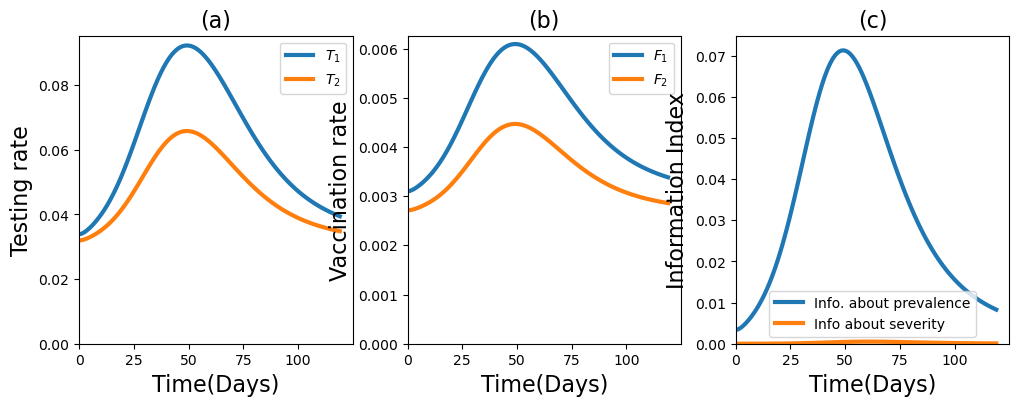

In [38]:
fig, axs = plt.subplots(1,3,figsize=(12,4))
axs[0].plot(tf,Test1_1,label='$T_{1}$', lw =3)
axs[0].plot(tf,Test2_1,label='$T_{2}$', lw =3)    
#axs[0].axhline(y = T10, color = 'r', label = 'Mandatory testing, $T_{10}=T_{20}$')
axs[0].legend(loc='best')
axs[0].set_xlabel('Time(Days)',fontsize=16)
axs[0].set_ylabel('Testing rate',fontsize=16)
axs[0].set_xlim(left =0)
axs[0].set_ylim(bottom =0)
axs[0].set_title('(a)', fontsize=16)
axs[1].plot(tf,Vac1_1,label='$F_{1}$', lw =3)
axs[1].plot(tf,Vac2_1,label='$F_{2}$', lw =3)    
axs[1].legend(loc='best')
axs[1].set_xlabel('Time(Days)',fontsize=16)
axs[1].set_ylabel('Vaccination rate',fontsize=16)
axs[1].set_xlim(left =0)
axs[1].set_ylim(bottom =0)
axs[1].set_title('(b)', fontsize=16)
axs[2].plot(tf,y[:,16],label='Info. about prevalence', lw =3)
axs[2].plot(tf,y[:,17],label='Info about severity', lw =3)    
axs[2].legend(loc='best')
axs[2].set_xlabel('Time(Days)',fontsize=16)
axs[2].set_ylabel('Information Index',fontsize=16)
axs[2].set_xlim(left =0)
axs[2].set_ylim(bottom =0)
axs[2].set_title('(c)', fontsize=16)

In [39]:
Diagonal = np.diag(pcov)
#print(Diagonal)

# Calculate standard deviations of the parameters from the diagonal elements.
param_std_dev = np.sqrt(np.diag(pcov))
print("Parameter Standard Deviations:")
print(param_std_dev)

Parameter Standard Deviations:
[0.03862434 0.01003441 0.0339978  0.33089411]


In [40]:
confidence_level = 0.95

# Calculate the critical value for the confidence interval.
critical_value = scipy.stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate confidence intervals for each parameter.
CI_k = (k1 - critical_value * param_std_dev[0], k1 + critical_value * param_std_dev[0])
CI_beta1 = (beta1 - critical_value * param_std_dev[1], beta1 + critical_value * param_std_dev[1])
CI_beta2 = (beta2 - critical_value * param_std_dev[2], beta2 + critical_value * param_std_dev[2])
CI_xi = (xi - critical_value * param_std_dev[3], xi + critical_value * param_std_dev[3])
# CI_B = (B - critical_value * param_std_dev[4], B + critical_value * param_std_dev[4])
# CI_Btilde = (Btilde - critical_value * param_std_dev[5], Btilde + critical_value * param_std_dev[5])
# CI_a = (a - critical_value * param_std_dev[6], a + critical_value * param_std_dev[6])
# CI_xi = (xi - critical_value * param_std_dev[7], xi + critical_value * param_std_dev[7])
# CI_Fmax = (Fmax - critical_value * param_std_dev[8], Fmax + critical_value * param_std_dev[8])


# CI_F10 = (F10 - critical_value * param_std_dev[9], F10 + critical_value * param_std_dev[9])

# CI_F20 = (F20 - critical_value * param_std_dev[10], F20 + critical_value * param_std_dev[10])
# CI_Tmax = (Tmax - critical_value * param_std_dev[11], Tmax + critical_value * param_std_dev[11])
# CI_T10 = (T10 - critical_value * param_std_dev[12], T10 + critical_value * param_std_dev[12])
# CI_T20 = (T20 - critical_value * param_std_dev[13], T20 + critical_value * param_std_dev[13])

# #Print confidence intervals.
print(f"Confidence Interval (k): {CI_k}")
print(f"Confidence Interval (beta1): {CI_beta1}")
print(f"Confidence Interval (beta2): {CI_beta2}")
print(f"Confidence Interval (xi): {CI_xi}")
# print(f"Confidence Interval (D): {CI_D}")
# print(f"Confidence Interval (Dtilde): {CI_Dtilde}")

# print(f"Confidence Interval (B): {CI_B}")

# print(f"Confidence Interval (Btilde): {CI_Btilde}")
# print(f"Confidence Interval (a): {CI_a}")

# 

# print(f"Confidence Interval (Fmax): {CI_Fmax}")
# print(f"Confidence Interval (F10): {CI_F10}")
# print(f"Confidence Interval (F20): {CI_F20}")
# print(f"Confidence Interval (Tmax): {CI_Tmax}")
# print(f"Confidence Interval (T10): {CI_T10}")
# print(f"Confidence Interval (T20): {CI_T20}")


Confidence Interval (k): (0.43008225183034077, 0.5814868880818572)
Confidence Interval (beta1): (0.6338395968307762, 0.6731737550212655)
Confidence Interval (beta2): (0.3272966549044133, 0.4605655989726669)
Confidence Interval (xi): (0.35145946218618684, 1.648540537813809)


In [41]:
critical_value

1.959963984540054